# 4. Frame select gradients

In [1]:
from src import *

import warnings
warnings.filterwarnings("ignore")

## Description

We want to look at the frame selected gradients and their general properties

GOAL: Visualize frame selected gradients

## Table of Contents
- [Frame select Subject (3FA)](#subject)
    - Compute Fselect with intersections of 2 of the 3FA
    - Compute Marginals along only 1 of the 3FA
- [Frame select Visualize (3FA)](#visualize)
    - Affinity variance comparisons
    - Joint Plot of 1st and 2nd Gradient + 1st and 3rd Gradient (2D)
    - Visualization Gradients
    - Cross conditions correlations

In [2]:
# Params
embedding  = "dm" # diffusion map
aff_kernel = "pearson" #affinity matrix kernel
align_meth = "procrustes"
n_iter     = 10 # procrustes align number of iteration
nb_comp    = 3
rs         = 9

# In-Tervals percentages
s20 = [(s,s+20) for s in range(0,101,20) if (s+20 <= 100)]
s25 = [(s,s+25) for s in range(0,101,25) if (s+25 <= 100)]

<a class="anchor" id="subject"></a>
## Frame select Subject (3FA)
We simply construct here the individual gradients frame select (supermovie)

### 1. Compute Fselect with intersections of 2 of the 3FA

In [7]:
# # bin 25
threshed_series = {0:load('./resources/threshed_series/fa_global_cross_tseries_val-aro_bin25.pkl')}
# threshed_series = {0:load('./resources/threshed_series/fa_global_cross_tseries_val-pow_bin25.pkl')}
# threshed_series = {0:load('./resources/threshed_series/fa_global_cross_tseries_aro-pow_bin25.pkl')}

In [8]:
fa_sub = {}
for i in range(len(threshed_series)):
    # individual variance variables
    fselect_subjects_gradients = {}
    
    threshed = threshed_series[i]
    for rng in tqdm(threshed.keys()):
        selected_series = threshed[rng]

        # concatenate on different frames across movies
        # basically doing reordering of columns
        tmp = next(iter(selected_series))
        subject_numbers = list(selected_series[tmp].keys())
        subject_tmpseries = {_id:[] for _id in subject_numbers}

        for mname in selected_series:
            if len(selected_series[mname]) == 0: continue
            for _id in subject_numbers:
                subject_tmpseries[_id].append(selected_series[mname][_id])

        subject_series = []
        for _id in subject_numbers:
            subject_series.append(np.concatenate(subject_tmpseries[_id]))

        # if concatenated length not long enough then skip whole process
        if len(subject_series[0]) < 15: 
            fselect_subjects_gradients[rng] = []
            continue

        # Compute individual gradients according to selected frames
        subjects_gradients = []
        for nsub in range(len(subject_numbers)):
            tmp_series = np.asarray(subject_series)[nsub]
            fc_selects = FC(tmp_series)
            g_selects = GradientMaps(n_components=nb_comp, approach=embedding, 
                                kernel=aff_kernel, random_state=rs)
            g_selects.fit(fc_selects)
            subjects_gradients.append(g_selects.gradients_)

        # alignement across all gradients
        select_subjects_gradients,_,s = procrustes_align(np.asarray(subjects_gradients))
        select_subjects_gradients = np.asarray(select_subjects_gradients)
        select_subjects_super = {}
        for sidx,_id in enumerate(subject_numbers):
            select_subjects_super[_id] = select_subjects_gradients[sidx]

        fselect_subjects_gradients[rng] = select_subjects_super
    fa_sub[i] = fselect_subjects_gradients

save('./resources/fselect_grads/fa_scores_withID/fglobal_cross_grads_supermovie_withID_val-aro_bin25.pkl',
     fa_sub)

  0%|          | 0/16 [00:00<?, ?it/s]

### 2. Compute Marginals along only 1 of the 3FA

In [9]:
threshed_series = load('./resources/threshed_series/fa_global_treshed_series.pkl')

In [10]:
fa_sub = {}
for i in range(len(threshed_series)):
    # individual variance variables
    fselect_subjects_gradients = {}
    
    threshed = threshed_series[i]
    for rng in tqdm(threshed.keys()):
        selected_series = threshed[rng]

        # concatenate on different frames across movies
        # basically doing reordering of columns
        tmp = next(iter(selected_series))
        subject_numbers = list(selected_series[tmp].keys())
        subject_tmpseries = {_id:[] for _id in subject_numbers}

        for mname in selected_series:
            if len(selected_series[mname]) == 0: continue
            for _id in subject_numbers:
                subject_tmpseries[_id].append(selected_series[mname][_id])

        subject_series = []
        for _id in subject_numbers:
            subject_series.append(np.concatenate(subject_tmpseries[_id]))

        # if concatenated length not long enough then skip whole process
        if len(subject_series[0]) < 15: 
            fselect_subjects_gradients[rng] = []
            continue

        # Compute individual gradients according to selected frames
        subjects_gradients = []
        for nsub in range(len(subject_numbers)):
            tmp_series = np.asarray(subject_series)[nsub]
            fc_selects = FC(tmp_series)
            g_selects = GradientMaps(n_components=nb_comp, approach=embedding, 
                                kernel=aff_kernel, random_state=rs)
            g_selects.fit(fc_selects)
            subjects_gradients.append(g_selects.gradients_)

        # alignement across all gradients
        select_subjects_gradients,_,s = procrustes_align(np.asarray(subjects_gradients))
        select_subjects_gradients = np.asarray(select_subjects_gradients)
        select_subjects_super = {}
        for sidx,_id in enumerate(subject_numbers):
            select_subjects_super[_id] = select_subjects_gradients[sidx]

        fselect_subjects_gradients[rng] = select_subjects_super
    fa_sub[i] = fselect_subjects_gradients

save('./resources/fselect_grads/fa_scores_withID/fselected_global_grads_supermovie_withID.pkl',
     fa_sub)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

#### Generate Individual Gradients from Random selected Frames

In [11]:
# # bins 25 random select
# random_series = {0:load('./resources/threshed_series/null_seriescube/rs1_50-1.pkl')}
# random_series = {0:load('./resources/threshed_series/null_seriescube/rs2_50-1.pkl')}
random_series = {0:load('./resources/threshed_series/null_seriescube/rs3_50-1.pkl')}

In [ ]:
fa_sub = {}
for i in range(len(random_series)):
    # individual variance variables
    threshed = random_series[i]
    fselect_subjects_gradients = {rng: [] for rng in tqdm(threshed.keys())}
    
    
    for rng in tqdm(threshed.keys()):
        selected_series = threshed[rng]

        # concatenate on different frames across movies
        # basically doing reordering of columns
        tmp = next(iter(selected_series))        
        subject_numbers = list(selected_series[tmp].keys())
        
        # random iterations
        for niter in range(len(selected_series[tmp][subject_numbers[0]])):
            
            subject_tmpseries = {_id:[] for _id in subject_numbers}

            for mname in selected_series:
                if len(selected_series[mname]) == 0: continue
                for _id in subject_numbers:
                    subject_tmpseries[_id].append(selected_series[mname][_id][niter])

            subject_series = []
            for _id in subject_numbers:
                subject_series.append(np.concatenate(subject_tmpseries[_id]))

            # if concatenated length not long enough then skip whole process
            if len(subject_series[0]) < 15: 
                fselect_subjects_gradients[rng] = []
                continue

            # Compute individual gradients according to selected frames
            subjects_gradients = []
            for nsub in range(len(subject_numbers)):
                tmp_series = np.asarray(subject_series)[nsub]
                fc_selects = FC(tmp_series)
                g_selects = GradientMaps(n_components=nb_comp, approach=embedding, 
                                    kernel=aff_kernel, random_state=rs)
                g_selects.fit(fc_selects)
                subjects_gradients.append(g_selects.gradients_)

            # alignement across all gradients
            select_subjects_gradients,_,s = procrustes_align(np.asarray(subjects_gradients))
            select_subjects_gradients = np.asarray(select_subjects_gradients)
            select_subjects_super = {}
            for sidx,_id in enumerate(subject_numbers):
                select_subjects_super[_id] = select_subjects_gradients[sidx]

            fselect_subjects_gradients[rng].append(deepcopy(select_subjects_super))
    fa_sub[i] = fselect_subjects_gradients

save('./resources/fselect_grads/fa_scores_withID/random_select_grads/rs3_50-1_grad.pkl', fa_sub)

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

In [13]:
random_series = {0:load('./resources/threshed_series/null_seriescube/rs2_50-1.pkl')}
fa_sub = {}
for i in range(len(random_series)):
    # individual variance variables
    threshed = random_series[i]
    fselect_subjects_gradients = {rng: [] for rng in tqdm(threshed.keys())}
    
    
    for rng in tqdm(threshed.keys()):
        selected_series = threshed[rng]

        # concatenate on different frames across movies
        # basically doing reordering of columns
        tmp = next(iter(selected_series))        
        subject_numbers = list(selected_series[tmp].keys())
        
        # random iterations
        for niter in range(len(selected_series[tmp][subject_numbers[0]])):
            
            subject_tmpseries = {_id:[] for _id in subject_numbers}

            for mname in selected_series:
                if len(selected_series[mname]) == 0: continue
                for _id in subject_numbers:
                    subject_tmpseries[_id].append(selected_series[mname][_id][niter])

            subject_series = []
            for _id in subject_numbers:
                subject_series.append(np.concatenate(subject_tmpseries[_id]))

            # if concatenated length not long enough then skip whole process
            if len(subject_series[0]) < 15: 
                fselect_subjects_gradients[rng] = []
                continue

            # Compute individual gradients according to selected frames
            subjects_gradients = []
            for nsub in range(len(subject_numbers)):
                tmp_series = np.asarray(subject_series)[nsub]
                fc_selects = FC(tmp_series)
                g_selects = GradientMaps(n_components=nb_comp, approach=embedding, 
                                    kernel=aff_kernel, random_state=rs)
                g_selects.fit(fc_selects)
                subjects_gradients.append(g_selects.gradients_)

            # alignement across all gradients
            select_subjects_gradients,_,s = procrustes_align(np.asarray(subjects_gradients))
            select_subjects_gradients = np.asarray(select_subjects_gradients)
            select_subjects_super = {}
            for sidx,_id in enumerate(subject_numbers):
                select_subjects_super[_id] = select_subjects_gradients[sidx]

            fselect_subjects_gradients[rng].append(deepcopy(select_subjects_super))
    fa_sub[i] = fselect_subjects_gradients

save('./resources/fselect_grads/fa_scores_withID/random_select_grads/rs2_50-1_grad.pkl', fa_sub)

In [14]:
random_series = {0:load('./resources/threshed_series/null_seriescube/rs1_50-1.pkl')}
fa_sub = {}
for i in range(len(random_series)):
    # individual variance variables
    threshed = random_series[i]
    fselect_subjects_gradients = {rng: [] for rng in tqdm(threshed.keys())}
    
    
    for rng in tqdm(threshed.keys()):
        selected_series = threshed[rng]

        # concatenate on different frames across movies
        # basically doing reordering of columns
        tmp = next(iter(selected_series))        
        subject_numbers = list(selected_series[tmp].keys())
        
        # random iterations
        for niter in range(len(selected_series[tmp][subject_numbers[0]])):
            
            subject_tmpseries = {_id:[] for _id in subject_numbers}

            for mname in selected_series:
                if len(selected_series[mname]) == 0: continue
                for _id in subject_numbers:
                    subject_tmpseries[_id].append(selected_series[mname][_id][niter])

            subject_series = []
            for _id in subject_numbers:
                subject_series.append(np.concatenate(subject_tmpseries[_id]))

            # if concatenated length not long enough then skip whole process
            if len(subject_series[0]) < 15: 
                fselect_subjects_gradients[rng] = []
                continue

            # Compute individual gradients according to selected frames
            subjects_gradients = []
            for nsub in range(len(subject_numbers)):
                tmp_series = np.asarray(subject_series)[nsub]
                fc_selects = FC(tmp_series)
                g_selects = GradientMaps(n_components=nb_comp, approach=embedding, 
                                    kernel=aff_kernel, random_state=rs)
                g_selects.fit(fc_selects)
                subjects_gradients.append(g_selects.gradients_)

            # alignement across all gradients
            select_subjects_gradients,_,s = procrustes_align(np.asarray(subjects_gradients))
            select_subjects_gradients = np.asarray(select_subjects_gradients)
            select_subjects_super = {}
            for sidx,_id in enumerate(subject_numbers):
                select_subjects_super[_id] = select_subjects_gradients[sidx]

            fselect_subjects_gradients[rng].append(deepcopy(select_subjects_super))
    fa_sub[i] = fselect_subjects_gradients

save('./resources/fselect_grads/fa_scores_withID/random_select_grads/rs1_50-1_grad.pkl', fa_sub)

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

<a class="anchor" id="visualize"></a>
## Frame select Visualize (3FA)

In [16]:
embedding  = "dm" # diffusion map
aff_kernel = "pearson" #affinity matrix kernel
align_meth = "procrustes"
n_iter     = 10 # procrustes align number of iteration
nb_comp    = 20
rs         = 99

# In-Tervals percentages
s5 = [(s,s+5) for s in range(0,101,5) if (s+5 <= 100)]
s10 = [(s,s+10) for s in range(0,101,10) if (s+10 <= 100)]
s20 = [(s,s+20) for s in range(0,101,20) if (s+20 <= 100)]
s25 = [(s,s+25) for s in range(0,101,25) if (s+25 <= 100)]
s33 = [(0,33), (33,66), (66,100)]
s50 = [(0,50), (50,100)]

In [17]:
threshed_series = load('./resources/threshed_series/fa_global_treshed_series.pkl')

Frame selected

In [18]:
fselect_group_gradients = {}
fselect_group_expvar = {}
for i in tqdm(range(3)):
    # individual variance variables
    fselect_subjects_gradients = {}
    fselect_subjects_expvar = {}
    threshed = threshed_series[i]
    for rng in tqdm(threshed.keys()):
        selected_series = threshed[rng]

        # concatenate on different frames across movies
        # basically doing reordering of columns
        tmp = next(iter(selected_series))
        subject_numbers = list(selected_series[tmp].keys())
        subject_tmpseries = {_id:[] for _id in subject_numbers}

        for mname in selected_series:
            if len(selected_series[mname]) == 0: continue
            for _id in subject_numbers:
                subject_tmpseries[_id].append(selected_series[mname][_id])

        subject_series = []
        for _id in subject_numbers:
            subject_series.append(np.concatenate(subject_tmpseries[_id]))

        # if concatenated length not long enough then skip whole process
        if len(subject_series[0]) < 15: 
            fselect_subjects_gradients[rng] = []
            continue

        # Compute individual gradients according to selected frames
        group_series = []
        for nsub in range(len(subject_numbers)):
            tmp_series = np.asarray(subject_series)[nsub]
            group_series.append(tmp_series)
            
        fc_selects = FC(np.concatenate(group_series))
        g_selects = GradientMaps(n_components=nb_comp, approach=embedding, 
                                kernel=aff_kernel, random_state=rs)
        g_selects.fit(fc_selects)

        fselect_subjects_gradients[rng] = g_selects.gradients_
        fselect_subjects_expvar[rng] = g_selects.lambdas_
    
    fselect_group_gradients[i] = fselect_subjects_gradients
    fselect_group_expvar[i] = fselect_subjects_expvar

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Films

In [19]:
total_series = load('./data/fmri_414_series.pkl')
del total_series['Rest']

allmovies_series = []
for mname in total_series:
    movie_series = total_series[mname]
    allmovies_series.append(np.concatenate(np.asarray(list(movie_series.values()))))
    
allmovies_series = np.concatenate(allmovies_series)
fc_movies = FC(allmovies_series)
g_movies = GradientMaps(n_components=nb_comp, approach=embedding, 
                        kernel=aff_kernel, random_state=rs)
g_movies.fit(fc_movies)

movies_grad = g_movies.gradients_
movies_expvar = g_movies.lambdas_

Rest

In [20]:
# Rest Gradients Computation
mri_path414 = './data/fmri414_compiled/'
rest_series  = []
mri_df414rest   = pd.read_csv(mri_path414 + "Rest_compiled414.csv")
rests  = [m for m in mri_df414rest.filename.unique() if "414" in m]
for r in rests:
    tmp2, _ = df_to_timeseries(mri_df414rest, r)
    rest_series.append(tmp2)
    

rests_series = np.concatenate(rest_series)
fc_rests = FC(rests_series)
g_rests = GradientMaps(n_components=nb_comp, approach=embedding, 
                        kernel=aff_kernel, random_state=rs)
g_rests.fit(fc_rests)

rest_grad = g_rests.gradients_
rest_expvar = g_rests.lambdas_

In [21]:
# Logging the exp vars
save("./resources/expvarlogs/fselect_info.pkl", (fselect_group_gradients,fselect_group_expvar))
save("./resources/expvarlogs/movies_info.pkl", (movies_grad,movies_expvar))
save("./resources/expvarlogs/rest_info.pkl", (rest_grad,rest_expvar))

### Load Logs

In [27]:
fselect_group_gradients, fselect_group_expvar = load('./resources/expvarlogs/fselect_info.pkl')
movies_grad, movies_expvar = load('./resources/expvarlogs/movies_info.pkl')
rest_grad, rest_expvar = load('./resources/expvarlogs/rest_info.pkl')

### Affinity variance comparisons

1. First comparison Rest Vs Movie Vs FS

In [28]:
var_rests = rest_expvar/rest_expvar.sum()
var_movies = movies_expvar/movies_expvar.sum()
var_fselect = deepcopy(fselect_group_expvar[1][(75,100)])
var_fselect /= var_fselect.sum()

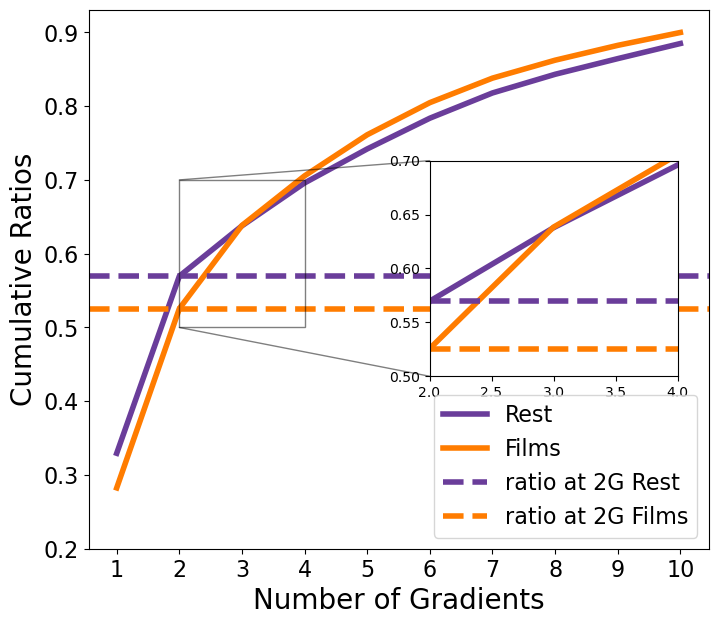

In [6]:
fig, ax = plt.subplots(figsize=(8,7))

ax.plot(np.arange(1,11),np.cumsum(var_rests)[:10], label='Rest', 
         c=sns.color_palette("Paired")[9], linewidth=4)
ax.plot(np.arange(1,11),np.cumsum(var_movies)[:10], label='Films',
         c=sns.color_palette("bright")[1], linewidth=4)

ax.axhline(y = np.cumsum(var_rests)[1], color = sns.color_palette("Paired")[9], linestyle = '--', 
            linewidth=4, label='ratio at 2G Rest')
ax.axhline(y = np.cumsum(var_movies)[1], color = sns.color_palette("bright")[1], linestyle = '--', 
            linewidth=4, label='ratio at 2G Films')

axins = ax.inset_axes([0.55, 0.32, 0.4, 0.4])
axins.plot(np.arange(1,11),np.cumsum(var_rests)[:10], label='Rest', 
         c=sns.color_palette("Paired")[9], linewidth=4)
axins.plot(np.arange(1,11),np.cumsum(var_movies)[:10], label='Films',
         c=sns.color_palette("bright")[1], linewidth=4)

axins.axhline(y = np.cumsum(var_rests)[1], color = sns.color_palette("Paired")[9], linestyle = '--', 
            linewidth=4, label='ratio at 2G Rest')
axins.axhline(y = np.cumsum(var_movies)[1], color = sns.color_palette("bright")[1], linestyle = '--', 
            linewidth=4, label='ratio at 2G Films')

axins.set_xlim(2, 4)
axins.set_ylim(0.5, 0.7)
ax.indicate_inset_zoom(axins, edgecolor="black")

ax.set_xlabel('Number of Gradients', fontsize=20)
ax.set_ylabel('Cumulative Ratios', fontsize=20)

ax.set_xticks(np.arange(1,11))
ax.set_xticklabels(np.arange(1,11), fontsize=16)
ax.set_yticks(np.arange(2,10)/10)
ax.set_yticklabels(np.arange(2,10)/10, fontsize=16)
ax.legend(prop={'size': 16})
plt.show()

2. Second comparison Movie Vs different FS

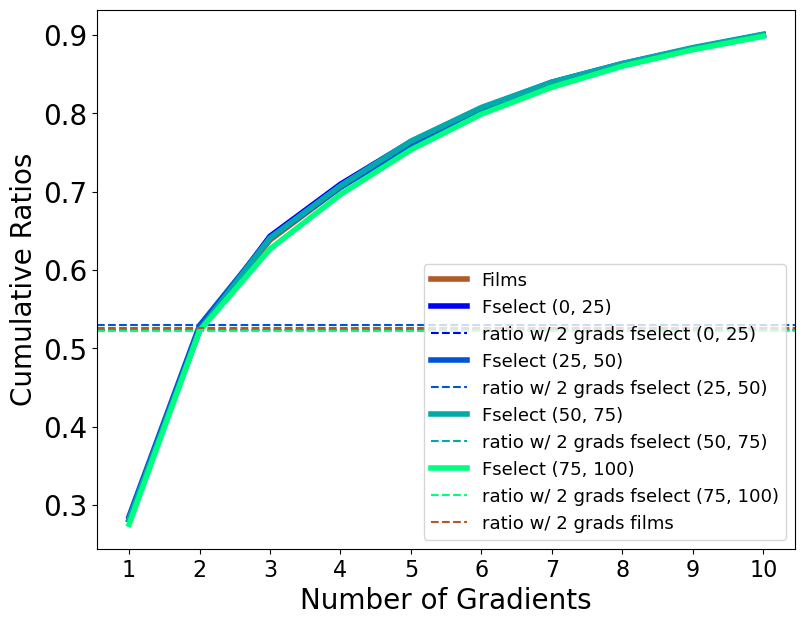

In [7]:
from matplotlib.pyplot import cm

color = cm.winter(np.linspace(0, 1, len(s25)))
var_movies = movies_expvar/movies_expvar.sum()

plt.figure(figsize=(9,7))

plt.plot(np.arange(1,11),np.cumsum(var_movies)[:10], label='Films', c=sns.color_palette("Paired")[11], linewidth=4)


for idx,bound in enumerate(s25):
    var_fselect = deepcopy(fselect_group_expvar[1][bound])
    var_fselect /= var_fselect.sum()
    plt.plot(np.arange(1,11),np.cumsum(var_fselect)[:10], label='Fselect {}'.format(bound), c=color[idx], 
             linewidth=4)
    plt.axhline(y = np.cumsum(var_fselect)[1], color = color[idx], linestyle = '--',
               label='ratio w/ 2 grads fselect {}'.format(bound))
#     plt.axhline(y = np.cumsum(var_fselect)[1], color = color[idx], linestyle = '--')


plt.axhline(y = np.cumsum(var_movies)[1], color = sns.color_palette("Paired")[11],
            linestyle = '--', label='ratio w/ 2 grads films')


plt.xlabel('Number of Gradients', fontsize=20)
plt.ylabel('Cumulative Ratios', fontsize=20)

plt.xticks(np.arange(1,11), fontsize=16)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 13})
plt.show()

### Joint Plot of 1st and 2nd Gradient + 1st and 3rd Gradient (2D)

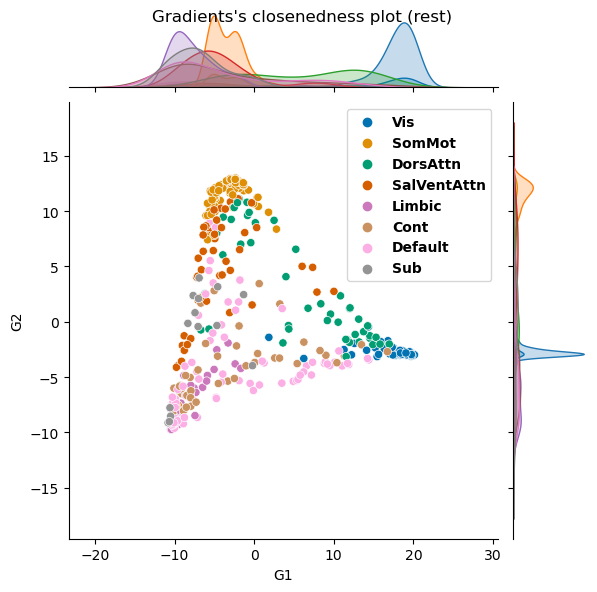

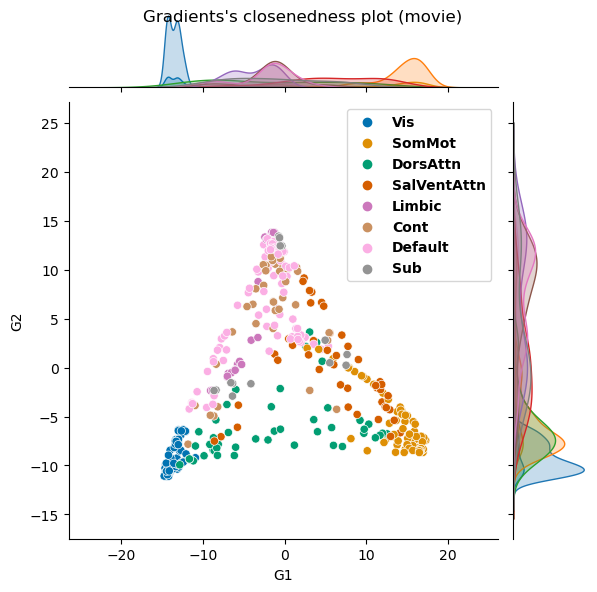

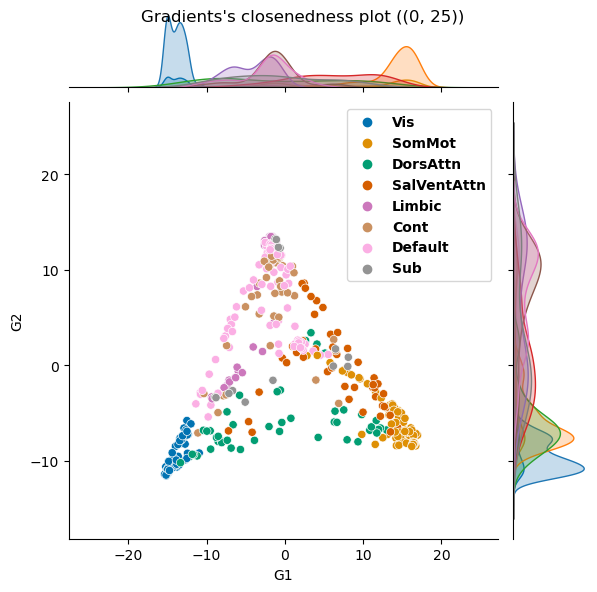

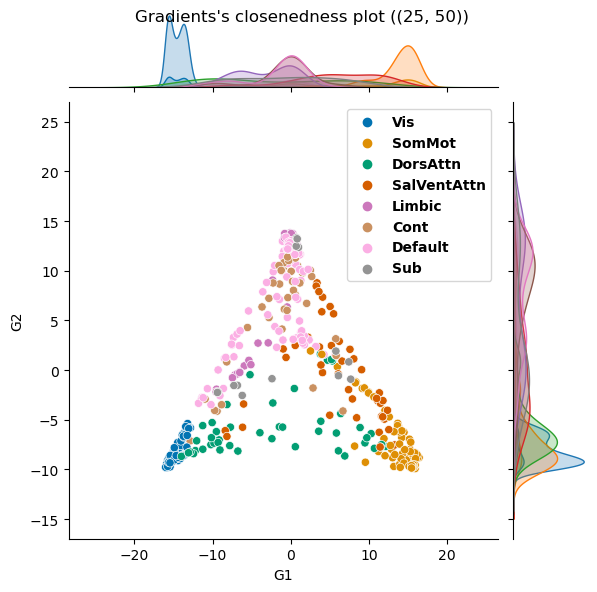

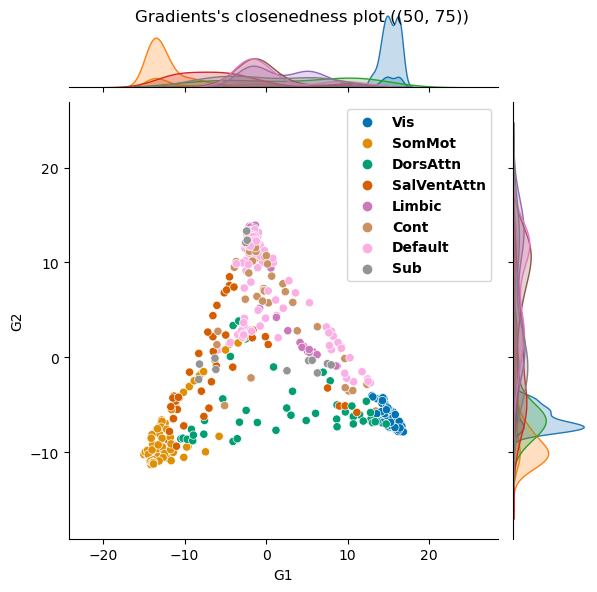

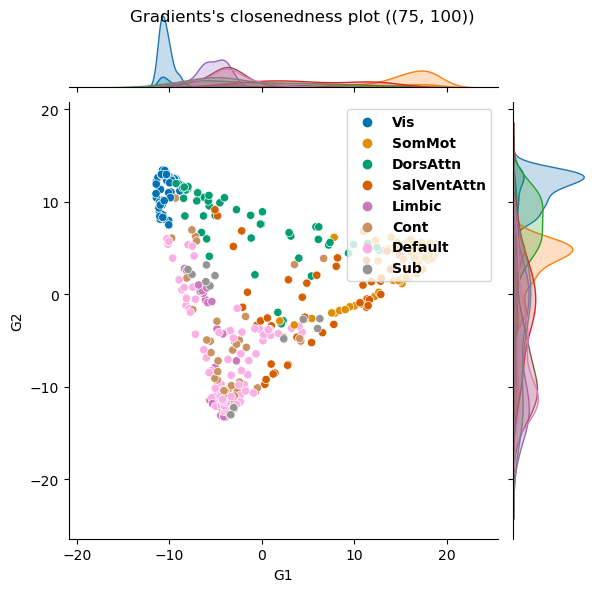

In [8]:
partial_region = load('./resources/region414yeo7.pkl')
coloring       = [partial_region[i] for i in range(414)]
pal            = sns.color_palette('colorblind', 8)

gs = [rest_grad, movies_grad]
gs += [fselect_group_gradients[1][s] for s in s25]

ts = ['rest', 'movie'] + s25
for i in range(len(gs)):
    # we keep exact same coloring method: same encoding
    tmp_df = {"G1":gs[i][:,0] , "G2": gs[i][:,1], "region": coloring}
    ax     = sns.jointplot(data=tmp_df, x="G1", y="G2", hue="region", palette=pal)
    df = pd.DataFrame.from_dict(tmp_df)

    for k in df.region.unique():
        data = df[df.region == k]

        sns.kdeplot(x=data.G1, fill=True, label=k, ax=ax.ax_marg_x)
        sns.kdeplot(y=data.G2, fill=True, label=k, ax=ax.ax_marg_y)

    ax.fig.suptitle("Gradients's closenedness plot ({})".format(ts[i]))

    legend_properties = {'weight':'bold','size':10}
    ax.ax_joint.legend(prop=legend_properties,loc='upper right')

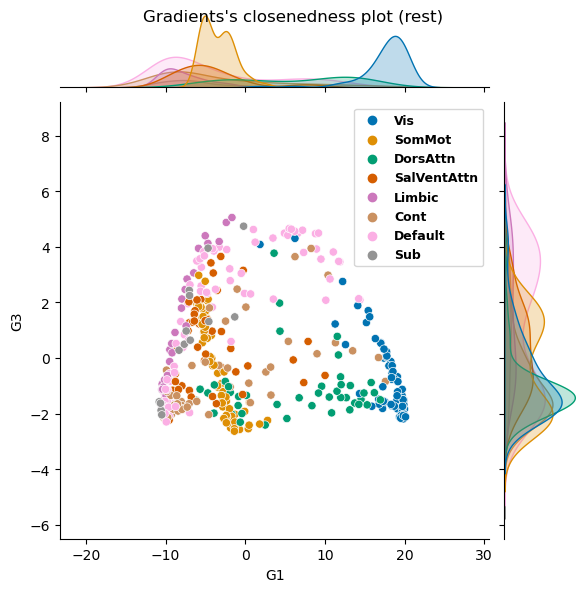

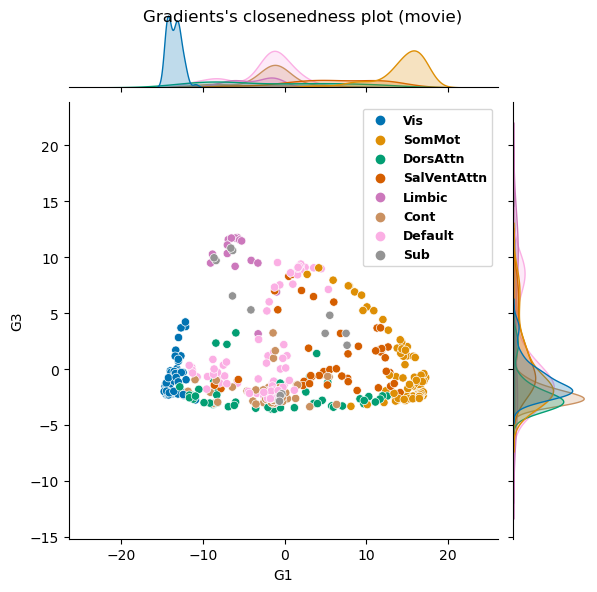

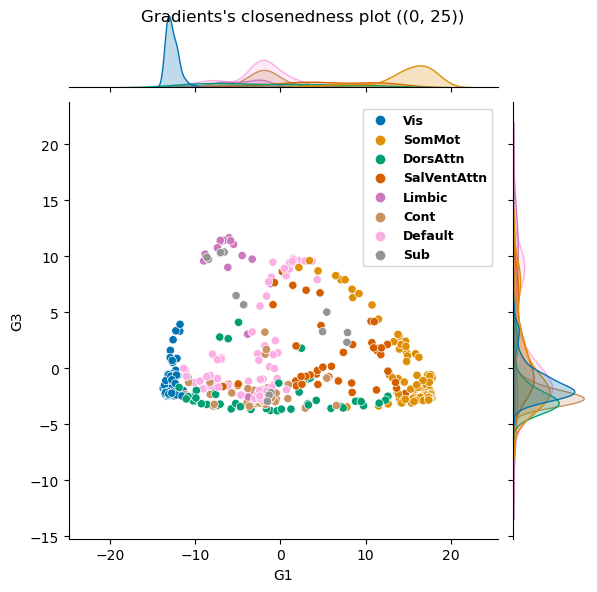

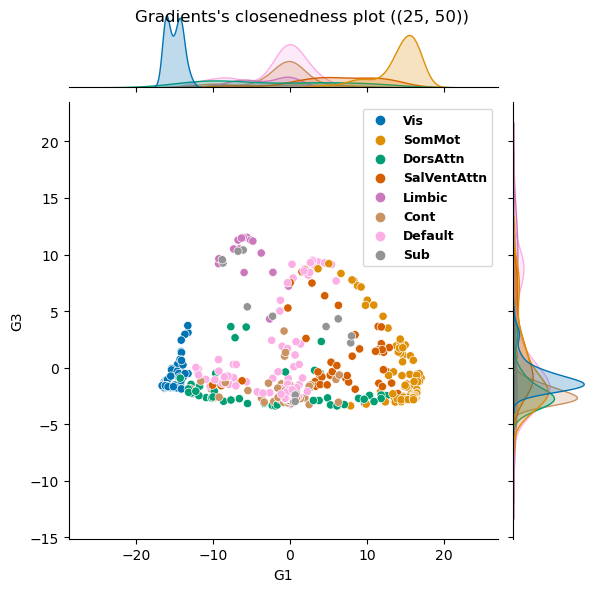

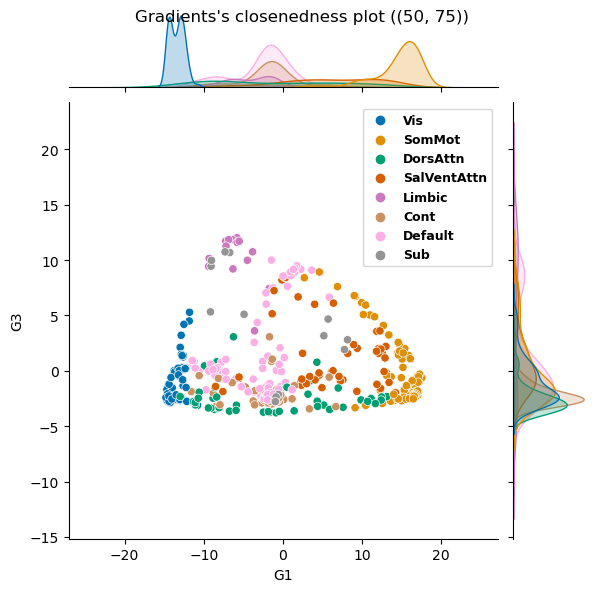

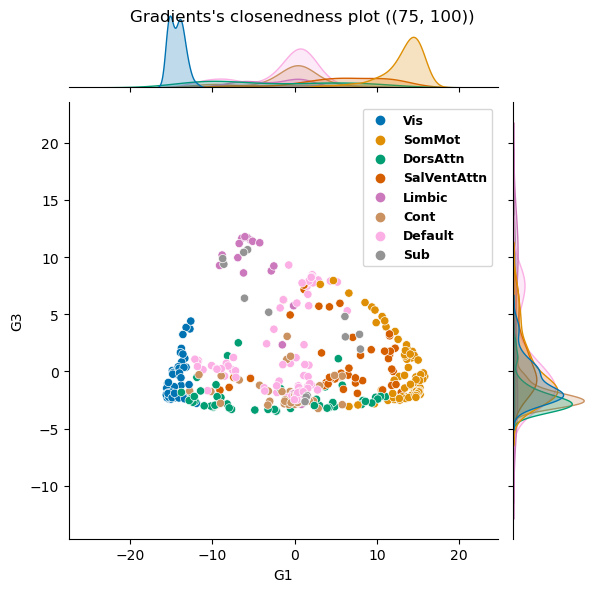

In [9]:
partial_region = load('./resources/region414yeo7.pkl')
coloring  = [partial_region[i] for i in range(414)]
pal       = sns.color_palette('colorblind', 8)

gs = [rest_grad, movies_grad]
gs += [fselect_group_gradients[2][s] for s in s25]

ts = ['rest', 'movie'] + s25
for i in range(len(gs)):
    # we keep exact same coloring method: same encoding
    tmp_df = {"G1":gs[i][:,0] , "G3": gs[i][:,2], "region": coloring}
    ax     = sns.jointplot(data=tmp_df, x="G1", y="G3", hue="region", palette=pal)
    ax.fig.suptitle("Gradients's closenedness plot ({})".format(ts[i]))
    legend_properties = {'weight':'bold','size':9}
    ax.ax_joint.legend(prop=legend_properties,loc='upper right')

### Visualization Gradients

#### Cortical

In [12]:
fselect_grad_tmp = fselect_group_gradients[1][(75,100)]
all_grads = [rest_grad, movies_grad, fselect_grad_tmp]
aligned, _, s = procrustes_align(all_grads)

In [20]:
# Parcellation 400
labeling         = load_parcellation('schaefer', scale=400, join=True)
surf_lh, surf_rh = load_conte69()

mask = labeling != 0
gs   = aligned
# ceiling effect on bounds 
bounds = [(int(np.concatenate(gs).min()), int(np.concatenate(gs).max())) for _ in range(3)]
grad = [None] * 9
texts = ['Grad1-Rest', 'Grad2-Rest', 'Grad3-Rest', 'Grad1-Movie', 'Grad2-Movie','Grad3-Movie', 
        'Grad1-Fselect', 'Grad2-Fselect', 'Grad3-Fselect']
for i in range(3):
    for k in range(3):
        # map the gradient to the parcels
        grad[i*3+k] = map_to_labels(gs[i][:400, k], labeling, mask=mask, fill=np.nan)


paths = ['../figures/rest-grad.jpg', '../figures/movies-grad.jpg', '../figures/fselect-grad.jpg']
for k in range(3):
        for gidx in range(3):
                genpath = paths[k][:-4] + str(gidx) + '.jpg'
                plot_hemispheres(surf_lh, surf_rh, array_name=[grad[3*k:3*(k+1)][gidx]], size=(550, 450), cmap='viridis_r', layout_style="grid",
                        color_bar=True, label_text=[texts[3*k:3*(k+1)][gidx]], zoom=1.3, embed_nb=True, interactive=False, screenshot=True, filename=genpath,
                        transparent_bg=False, color_range=bounds[gidx])

#### Subcortical

In [21]:
from enigmatoolbox.plotting import plot_subcortical
with open('./data/labels/TC_sub14_labels.csv') as f:
    text = f.readlines()
    text = [t.strip() for t in text]

order = "left-accumbens, left-amygdala, left-caudate, left-hippocampus, left-pallidum, left-putamen, left-thalamus, right-accumbens, right-amygdala, right-caudate, right-hippocampus, right-pallidum, right-putamen, right-thalamus".split(',')
order = [' '.join(o.split('-')).strip() for o in order]
dataorder = [t.lower() for t in text]
orderidx = [order.index(o) for o in dataorder]

# "color-range" flag can be used if needed very useful instead of artificially
# Project the results on the surface brain
for gidx in range(3):
    plot_subcortical(array_name=rest_grad[400:,gidx][orderidx], ventricles=False, size=(800, 400), color_range=bounds[gidx],
                    cmap='viridis_r', color_bar=True, embed_nb=False, label_text=['rest sub'], interactive=False, transparent_bg=False,
                    screenshot=True, filename='../figures/rest-subcorticalgrad{}.jpg'.format(gidx), zoom=1.3)
    plot_subcortical(array_name=movies_grad[400:,gidx][orderidx], ventricles=False, size=(800, 400), color_range=bounds[gidx],
                    cmap='viridis_r', color_bar=True,embed_nb=False, label_text=['movie sub'], interactive=False,transparent_bg=False,
                    screenshot=True, filename='../figures/movies-subcorticalgrad{}.jpg'.format(gidx), zoom=1.3)
    plot_subcortical(array_name=fselect_grad_tmp[400:,gidx][orderidx], ventricles=False, size=(800, 400), color_range=bounds[gidx],
                    cmap='viridis_r', color_bar=True,embed_nb=False, label_text=['movie sub'], interactive=False,transparent_bg=False,
                    screenshot=True, filename='../figures/fselect-subcorticalgrad{}.jpg'.format(gidx), zoom=1.3)

### Cross conditions correlations

In [31]:
all_grads = [rest_grad, movies_grad] + [fselect_group_gradients[1][bound] for bound in s25]
aligned, _, s = procrustes_align(all_grads)

In [32]:
# Film vs rest
cross_cond = np.zeros((aligned.shape[2],aligned.shape[2]))
cond1 = aligned[0]
cond2 = aligned[1]
for k in range(cond1.shape[1]):
    for j in range(cond2.shape[1]):
        cross_cond[k,j] = pearson_correlation(cond1[:,k], cond2[:,j])

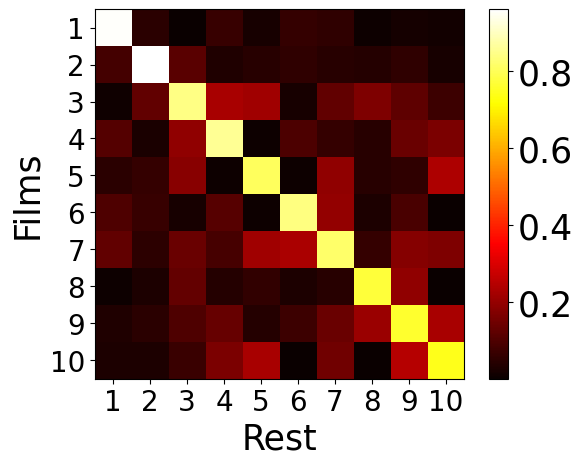

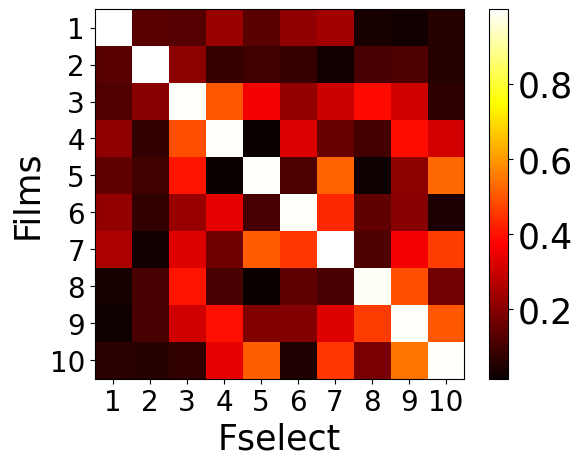

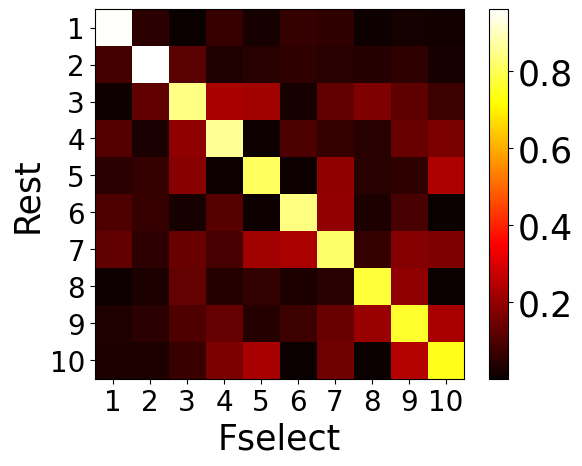

In [7]:
# Film vs rest
fig, ax = plt.subplots()

im = ax.imshow(np.abs(cross_cond[:10,:10]), cmap='hot')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels(1+np.arange(10), fontsize=20)
ax.set_yticklabels(1+np.arange(10), fontsize=20)
ax.set_ylabel('Films', fontsize=25)
ax.set_xlabel('Rest', fontsize=25)
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=25) 

plt.show()

# Film vs FS1
cross_cond = np.zeros((aligned.shape[2],aligned.shape[2]))
cond1 = aligned[1]
cond2 = aligned[-1]
for k in range(cond1.shape[1]):
    for j in range(cond2.shape[1]):
        cross_cond[k,j] = pearson_correlation(cond1[:,k], cond2[:,j])

fig, ax = plt.subplots()

im = ax.imshow(np.abs(cross_cond[:10,:10]), cmap='hot')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels(1+np.arange(10), fontsize=20)
ax.set_yticklabels(1+np.arange(10), fontsize=20)
ax.set_ylabel('Films', fontsize=25)
ax.set_xlabel('Fselect', fontsize=25)
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=25) 
plt.show()

# Rest vs FS1
cross_cond = np.zeros((aligned.shape[2],aligned.shape[2]))
cond1 = aligned[0]
cond2 = aligned[-1]
for k in range(cond1.shape[1]):
    for j in range(cond2.shape[1]):
        cross_cond[k,j] = pearson_correlation(cond1[:,k], cond2[:,j])
        
fig, ax = plt.subplots()

im = ax.imshow(np.abs(cross_cond[:10,:10]), cmap='hot')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels(1+np.arange(10), fontsize=20)
ax.set_yticklabels(1+np.arange(10), fontsize=20)
ax.set_ylabel('Rest', fontsize=25)
ax.set_xlabel('Fselect', fontsize=25)
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=25) 

plt.show()

### Distance on manifold gradients display

In [24]:
fselect_grad_tmp = fselect_group_gradients[1][(75,100)]
all_grads = [rest_grad, movies_grad, fselect_grad_tmp]
aligned, _, s = procrustes_align(all_grads)

diff_RM = (aligned[0] - aligned[1])
diff_RF = (aligned[0] - aligned[2])
diff_MF = (aligned[1] - aligned[2])

#### Cortical

In [30]:
# Parcellation 400
labeling         = load_parcellation('schaefer', scale=400, join=True)
surf_lh, surf_rh = load_conte69()

mask = labeling != 0
gs   = [diff_RM, diff_RF, diff_MF]

bounds = [(np.concatenate(gs).min(), np.concatenate(gs).max()) for _ in range(3)]
grad = [None] * 9
for i in range(3):
    for k in range(3):
        # map the gradient to the parcels
        grad[i*3+k] = map_to_labels(gs[i][:400, k], labeling, mask=mask, fill=np.nan)


paths = ['../figures/dist_conditions/rest-movies.jpg', '../figures/dist_conditions/rest-fselect.jpg', '../figures/dist_conditions/movies-fselect.jpg']
for k in range(3):
        for gidx in range(3):
                genpath = paths[k][:-4] + str(gidx) + '.jpg'
                plot_hemispheres(surf_lh, surf_rh, array_name=[grad[3*k:3*(k+1)][gidx]], size=(550, 450), cmap='bwr', layout_style="grid",
                        color_bar=True, label_text=[texts[3*k:3*(k+1)][gidx]], zoom=1.3, embed_nb=True, interactive=False, screenshot=True, filename=genpath,
                        transparent_bg=False, color_range=bounds[gidx])

#### Subcortical

In [31]:
from enigmatoolbox.plotting import plot_subcortical
with open('./data/labels/TC_sub14_labels.csv') as f:
    text = f.readlines()
    text = [t.strip() for t in text]

order = "left-accumbens, left-amygdala, left-caudate, left-hippocampus, left-pallidum, left-putamen, left-thalamus, right-accumbens, right-amygdala, right-caudate, right-hippocampus, right-pallidum, right-putamen, right-thalamus".split(',')
order = [' '.join(o.split('-')).strip() for o in order]
dataorder = [t.lower() for t in text]
orderidx = [order.index(o) for o in dataorder]

# "color-range" flag can be used if needed very useful instead of artificially
# Project the results on the surface brain
for gidx in range(3):
    plot_subcortical(array_name=rest_grad[400:,gidx][orderidx], ventricles=False, size=(800, 400), color_range=bounds[gidx],
                    cmap='bwr', color_bar=True, embed_nb=False, label_text=['rest sub'], interactive=False, transparent_bg=False,
                    screenshot=True, filename='../figures/dist_conditions/rest-movies-subcorticalgrad{}.jpg'.format(gidx), zoom=1.3)
    plot_subcortical(array_name=movies_grad[400:,gidx][orderidx], ventricles=False, size=(800, 400), color_range=bounds[gidx],
                    cmap='bwr', color_bar=True,embed_nb=False, label_text=['movie sub'], interactive=False,transparent_bg=False,
                    screenshot=True, filename='../figures/dist_conditions/rest-fselect-subcorticalgrad{}.jpg'.format(gidx), zoom=1.3)
    plot_subcortical(array_name=fselect_grad_tmp[400:,gidx][orderidx], ventricles=False, size=(800, 400), color_range=bounds[gidx],
                    cmap='bwr', color_bar=True,embed_nb=False, label_text=['movie sub'], interactive=False,transparent_bg=False,
                    screenshot=True, filename='../figures/dist_conditions/movies-fselect-subcorticalgrad{}.jpg'.format(gidx), zoom=1.3)